In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### LDA for topic modeling

In [2]:
import sys
sys.getdefaultencoding()

'utf-8'

In [3]:
data = pd.read_csv('preprocessed_articles.csv',sep = ';',index_col = [0])
prep = pd.DataFrame(data)
prep

,title,content,date,author,region,zone
0,d’albert riunion anci regional decar,teram president gianguid d’albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"coronavirus, novit introdott dpcm 10 april 2020",sit minister dell’intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"coronavirus, nuov misur vend gener alimentar a...","pescar oggi, mercoled 15 aprile, president reg...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"regione, ecco guid formazion distanz iefp",pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,ministr amendol oddat all’iniz pd abruzz facebook,region “le scelt pd. l’ital l’abruzzo”: intito...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,"cop pir giornal telegram, salg 114 canal oscur",sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre
24580,"inchiest sanit umbra, chius indagini. l'ex gov...","chiusur dell'indagin assunzion sanità, destabi...",2020-05-04,La Repubblica,Lazio,Centre
24581,"coronavirus italia, 3691 denunc prim giorn fas 2","rom - aspett boom sanzion prim giorn fas due, ...",2020-05-05,La Repubblica,Lazio,Centre
24582,"coronavirus, medicina, denunc azione: ""tropp p...","ventiduemil medic pront entrar specialità, and...",2020-05-06,La Repubblica,Lazio,Centre


In [4]:
data = pd.read_csv('articles.csv',sep = ';',index_col = [0])
articles = pd.DataFrame(data)
articles

,title,content,date,author,region,zone
0,D’Alberto alla riunione delle ANCI regionali c...,TERAMO – Il Presidente Gianguido D’Alberto ha ...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"Coronavirus, le novità introdotte dal DPCM 10 ...",Sul sito del Ministero dell’Interno è stata pu...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"Coronavirus, nuove misure per vendita generi a...","PESCARA – Oggi, mercoledì 15 aprile, il Presid...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"Regione, ecco la guida per la formazione a dis...",PESCARA – Una vera e propria guida operativa i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,Ministro Amendola e Oddati all’iniziativa Pd A...,REGIONE – “Le scelte del Pd. Per l’Italia e pe...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,"Copie pirata di giornali su Telegram, salgono ...",È salito a 114 il numero dei canali Telegram s...,2020-05-04,La Repubblica,Lazio,Centre
24580,"Inchiesta sulla sanità umbra, chiuse le indagi...",La chiusura dell'indagine sulle assunzioni in ...,2020-05-04,La Repubblica,Lazio,Centre
24581,"Coronavirus in Italia, 3691 denunciati nel pri...",ROMA - Chi si aspettava un boom di sanzioni ne...,2020-05-05,La Repubblica,Lazio,Centre
24582,"Coronavirus, Medicina, la denuncia di Azione: ...",Ventiduemila medici sono pronti a entrare in s...,2020-05-06,La Repubblica,Lazio,Centre


In [5]:
stop_words_italian = ["a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinché","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altre","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","ben","bene","benissimo","brava","bravo","buono","c","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cinque","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comprare","comunque","con","concernente","conclusione","consecutivi","consecutivo","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","devo","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","doppio","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gente","gia","giacche","giorni","giorno","giu","già","gli","gliela","gliele","glieli","glielo","gliene","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ie","ieri","il","improvviso","in","inc","indietro","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","mio","modo","molta","molti","moltissimo","molto","momento","mondo","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","nome","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovi","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","promesso","proprio","puo","pure","purtroppo","può","qua","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quarto","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","quinto","realmente","recente","recentemente","registrazione","relativo","riecco","rispetto","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembrava","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","soprattutto","sotto","spesso","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","terzo","th","ti","titolo","tra","tranne","tre","trenta","triplo","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vai","vale","vari","varia","varie","vario","verso","vi","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words = stop_words_italian)
doc_term_matrix = count_vect.fit_transform(articles['content'].values.astype('U'))

In [48]:
doc_term_matrix

<24584x62149 sparse matrix of type '<class 'numpy.int64'>'
	with 2554149 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [59]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['donna', 'forze', 'controllo', 'personale', 'presso', 'cittadini', '19', 'locale', 'corso', 'carcere', 'interno', 'agenti', 'ordine', 'servizio', 'militari', 'misure', 'sicurezza', 'territorio', 'regionale', 'presidente', 'coronavirus', 'via', 'regione', 'lavoro', 'casa', 'emergenza', 'euro', 'polizia', 'attività', 'carabinieri']


Top 10 words for topic #1:
['dati', 'san', 'asl', 'casa', 'protezione', 'morti', 'intensiva', 'decessi', 'vigili', 'virus', 'isolamento', 'totale', 'terapia', 'medici', 'italia', 'fuoco', 'emergenza', 'marzo', 'tamponi', 'test', 'numero', 'regione', 'pazienti', 'positivi', 'provincia', '19', 'covid', 'ospedale', 'casi', 'coronavirus']




#### NMF for topic modeling

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words= stop_words_italian)
doc_term_matrix = tfidf_vect.fit_transform(articles['content'].values.astype('U'))

In [7]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [29]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['strada', 'personale', 'ospedale', 'emergenza', 'carcere', 'incidente', 'spaccio', 'giovane', 'corso', 'interno', 'forze', 'abitazione', 'controlli', 'napoli', 'ordine', 'arrestato', 'locale', 'vigili', 'auto', 'controllo', 'euro', 'fuoco', 'militari', 'agenti', 'attività', 'donna', 'casa', 'via', 'polizia', 'carabinieri']


Top 10 words for topic #1:
['24', 'epidemia', 'azienda', 'campobasso', 'inizio', 'emergenza', 'domiciliare', 'dati', 'ospedale', 'contagi', 'morti', 'ricoverati', 'asl', 'totale', 'isolamento', 'intensiva', 'terapia', 'numero', 'decessi', 'regione', 'guariti', 'test', '19', 'tamponi', 'covid', 'provincia', 'coronavirus', 'pazienti', 'positivi', 'casi']




This works better, we don't have coronavirus in both

In [9]:
topic_values = nmf.transform(doc_term_matrix)
articles['Topic'] = topic_values.argmax(axis=1)
articles.head()

,title,content,date,author,region,zone,Topic
0,D’Alberto alla riunione delle ANCI regionali c...,TERAMO – Il Presidente Gianguido D’Alberto ha ...,2020-04-15,Abruzzonews,Abruzzo,Centre,0
1,"Coronavirus, le novità introdotte dal DPCM 10 ...",Sul sito del Ministero dell’Interno è stata pu...,2020-04-15,Abruzzonews,Abruzzo,Centre,0
2,"Coronavirus, nuove misure per vendita generi a...","PESCARA – Oggi, mercoledì 15 aprile, il Presid...",2020-04-15,Abruzzonews,Abruzzo,Centre,1
3,"Regione, ecco la guida per la formazione a dis...",PESCARA – Una vera e propria guida operativa i...,2020-04-15,Abruzzonews,Abruzzo,Centre,0
4,Ministro Amendola e Oddati all’iniziativa Pd A...,REGIONE – “Le scelte del Pd. Per l’Italia e pe...,2020-04-15,Abruzzonews,Abruzzo,Centre,1


In [15]:
L_news = articles[articles['region'] == 'Lombardia']
L_news.head()

,title,content,date,author,region,zone,Topic
1949,Macron denunciato per il virus: i cittadini sp...,I promotori della class action contro lo Stato...,2020-05-09,Il Giornale,Lombardia,North,1
1950,Sindrome di Kawasaki: morto un bambino di 5 anni,"A New York, un bambino di 5 anni è deceduto pe...",2020-05-09,Il Giornale,Lombardia,North,1
1951,"Una valanga sulle montagne di Cortina: ""Morto ...","Un ragazzo, di 23 anni, è morto travolto da un...",2020-05-09,Il Giornale,Lombardia,North,0
1952,"""Abbiamo il tampone per suo padre"". Ma l'uomo ...",Due casi simili si sono verificati a Bergamo e...,2020-05-09,Il Giornale,Lombardia,North,1
1953,Le scarcerazioni dei boss indignano il fratell...,Nel giorno della memoria per Peppino Impastato...,2020-05-09,Il Giornale,Lombardia,North,0


In [21]:
df = pd.read_csv('newLombardia.csv')
L = pd.DataFrame(df)
L

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,nuovi_tamponi,nuovi_casi_testati,nuovi_deceduti
0,2020-02-24,Lombardia,76,19,95,71,166,0,166,0,6,172,1463,0.0,1463,0.0,6
1,2020-02-25,Lombardia,79,25,104,127,231,65,68,0,9,240,3700,0.0,2237,0.0,3
2,2020-02-26,Lombardia,79,25,104,145,249,18,18,0,9,258,3208,0.0,-492,0.0,0
3,2020-02-27,Lombardia,172,41,213,136,349,100,145,40,14,403,3320,0.0,112,0.0,5
4,2020-02-28,Lombardia,235,47,282,192,474,125,128,40,17,531,4835,0.0,1515,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-05,Lombardia,6201,509,6710,30382,37092,-215,500,27124,14389,78605,425290,255292.0,6455,3631.0,95
72,2020-05-06,Lombardia,6079,480,6559,25194,31753,-5339,764,33005,14611,79369,439806,262964.0,14516,7672.0,222
73,2020-05-07,Lombardia,5848,480,6328,25687,32015,262,720,33329,14745,80089,455294,262964.0,15488,0.0,134
74,2020-05-08,Lombardia,5702,400,6102,25881,31983,-32,634,33901,14839,80723,466287,277106.0,10993,14142.0,94


In [25]:
L_count = L_news.groupby('date').size().reset_index(name='size')
L['news'] = L_count['size']

In [23]:
L_count_c = L_news[L_news['Topic'] == 1].groupby('date').size().reset_index(name='size')
L['Covid_news'] = L_count_c['size']

In [56]:
L #Aggiunte colonne per news e covid_news

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,nuovi_tamponi,nuovi_casi_testati,nuovi_deceduti,Covid_news,news
0,2020-02-24,Lombardia,76,19,95,71,166,0,166,0,6,172,1463,0.0,1463,0.0,6,12,21
1,2020-02-25,Lombardia,79,25,104,127,231,65,68,0,9,240,3700,0.0,2237,0.0,3,3,13
2,2020-02-26,Lombardia,79,25,104,145,249,18,18,0,9,258,3208,0.0,-492,0.0,0,5,11
3,2020-02-27,Lombardia,172,41,213,136,349,100,145,40,14,403,3320,0.0,112,0.0,5,1,19
4,2020-02-28,Lombardia,235,47,282,192,474,125,128,40,17,531,4835,0.0,1515,0.0,3,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-05,Lombardia,6201,509,6710,30382,37092,-215,500,27124,14389,78605,425290,255292.0,6455,3631.0,95,14,48
72,2020-05-06,Lombardia,6079,480,6559,25194,31753,-5339,764,33005,14611,79369,439806,262964.0,14516,7672.0,222,13,54
73,2020-05-07,Lombardia,5848,480,6328,25687,32015,262,720,33329,14745,80089,455294,262964.0,15488,0.0,134,9,40
74,2020-05-08,Lombardia,5702,400,6102,25881,31983,-32,634,33901,14839,80723,466287,277106.0,10993,14142.0,94,9,47


In [57]:
from sklearn.preprocessing import MinMaxScaler #Scaling

scaler = MinMaxScaler()
L.iloc[:, 2:] = scaler.fit_transform(L.iloc[:, 2:])

In [59]:
L

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,nuovi_tamponi,nuovi_casi_testati,nuovi_deceduti,Covid_news,news
0,2020-02-24,Lombardia,0.000000,0.000000,0.000000,0.000000,0.000000,0.732474,0.045778,0.000000,0.000000,0.000000,0.000000,0.000000,0.122340,0.053682,0.010989,0.458333,0.316667
1,2020-02-25,Lombardia,0.000250,0.004405,0.000680,0.001848,0.001750,0.741391,0.015466,0.000000,0.000201,0.000839,0.004697,0.000000,0.170776,0.053682,0.005495,0.083333,0.183333
2,2020-02-26,Lombardia,0.000250,0.004405,0.000680,0.002441,0.002235,0.734943,0.000000,0.000000,0.000201,0.001061,0.003664,0.000000,0.000000,0.053682,0.000000,0.166667,0.150000
3,2020-02-27,Lombardia,0.007999,0.016153,0.008917,0.002144,0.004927,0.746193,0.039282,0.001110,0.000536,0.002850,0.003899,0.000000,0.037797,0.053682,0.009158,0.000000,0.283333
4,2020-02-28,Lombardia,0.013249,0.020558,0.014131,0.003992,0.008293,0.749623,0.034024,0.001110,0.000737,0.004429,0.007080,0.000000,0.125594,0.053682,0.005495,0.041667,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-05,Lombardia,0.510374,0.359765,0.499887,1.000000,0.994211,0.702977,0.149088,0.752629,0.964137,0.967675,0.889828,0.902676,0.434731,0.072381,0.173993,0.541667,0.766667
72,2020-05-06,Lombardia,0.500208,0.338473,0.488476,0.828841,0.850462,0.000000,0.230745,0.915813,0.979019,0.977101,0.920305,0.929803,0.939174,0.093191,0.406593,0.500000,0.866667
73,2020-05-07,Lombardia,0.480960,0.338473,0.471019,0.845106,0.857516,0.768418,0.217136,0.924804,0.988001,0.985984,0.952822,0.929803,1.000000,0.053682,0.245421,0.333333,0.633333
74,2020-05-08,Lombardia,0.468794,0.279736,0.453941,0.851506,0.856654,0.728083,0.190535,0.940675,0.994302,0.993807,0.975902,0.979807,0.718711,0.126511,0.172161,0.333333,0.750000


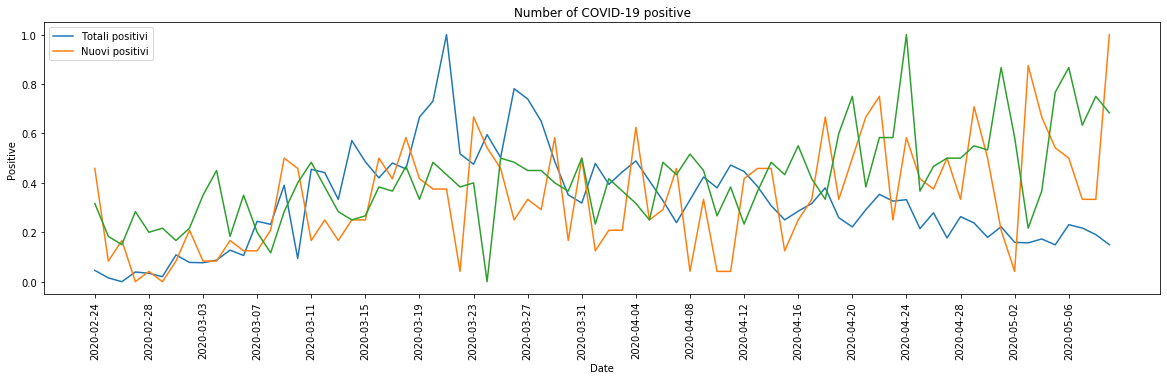

In [58]:
fig, ax = plt.subplots(figsize=(20, 5))  
x = L['data'] 
y = L['nuovi_positivi']
z = L['Covid_news']
w = L['news']

sns.lineplot(x, y, ax = ax);
sns.lineplot(x, z, ax = ax);
sns.lineplot(x, w, ax = ax);

ax.set_xticks(x[::4])
ax.set_xticklabels(x[::4], rotation=90)
ax.legend(['Totali positivi', 'Nuovi positivi'])
plt.xlabel('Date')
plt.ylabel('Positive')
plt.title('Number of COVID-19 positive')
plt.show(ax)

In [87]:
South = articles[(articles['zone'] == 'South') & (articles['Topic'] == 1)]
South

,title,content,date,author,region,zone,Topic
884,Coronavirus:in Gb muore bebè 6 settimane,"LONDRA, 8 MAG - C'è anche un bebè di sole 6.se...",2020-05-08,La Gazzetta del Mezzogiorno,Puglia,South,1
918,Asl Brindisi: rubati 48 kit di reagenti per i ...,La Asl Brindisi denuncia il «furto di 48 kit d...,2020-05-12,La Gazzetta del Mezzogiorno,Puglia,South,1
923,Morto Alpino più anziano d'Italia,"VENEZIA, 12 MAG - ""Come dicono gli Alpini, Gia...",2020-05-12,La Gazzetta del Mezzogiorno,Puglia,South,1
947,"Coronavirus, in Rsa Soleto muore 82enne: le vi...",Sale a 21 il bilancio dei decessi fra gli ospi...,2020-05-16,La Gazzetta del Mezzogiorno,Puglia,South,1
950,Positivo al coronavirus in carcere Raven,"RAVENNA, 17 MAG - Un detenuto di origine stran...",2020-05-17,La Gazzetta del Mezzogiorno,Puglia,South,1
...,...,...,...,...,...,...,...
23724,Detenuti di Busto Arsizio donano tablet ai mal...,"""Sappiamo cosa vuol dire essere isolati, non p...",2020-05-01,Fanpage,Campania,South,1
23733,"Anziani morti nelle Rsa, iniziate le audizioni...",Sono iniziate le audizioni dei famigliari degl...,2020-05-05,Fanpage,Campania,South,1
23741,"Ricoverato Bergamaschini, il geriatra del Triv...",Il geriatra del Pio Albergo Trivulzio di Milan...,2020-05-06,Fanpage,Campania,South,1
23746,Dica che sta andando da un parente. Il sinda...,"""Se la fermano dica che sta andando a trovare ...",2020-05-08,Fanpage,Campania,South,1


ValueError: all the input array dimensions except for the concatenation axis must match exactly

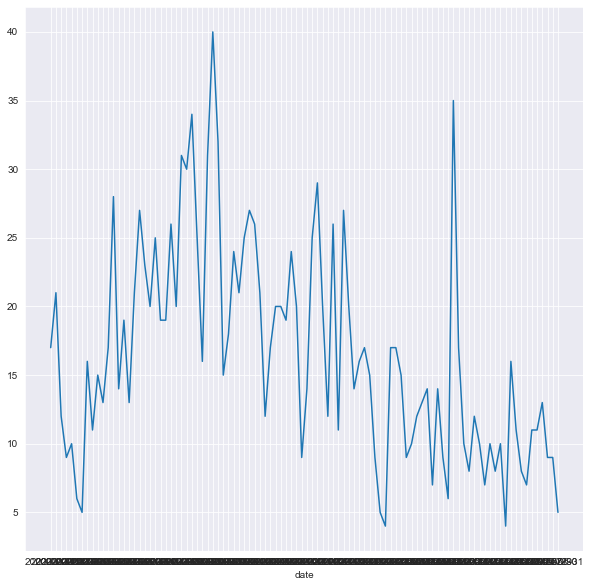

In [97]:
import matplotlib.ticker as plticker
import matplotlib
from datetime import datetime

sns.set_style("darkgrid")


count_South = South.groupby('date').count().iloc[:,0]
dates = count_South.index
r = range(len(dates))
fig, ax = plt.subplots(figsize=(10, 10))    
sns.lineplot(dates, count_South.values, ax = ax);
sns.regplot(r, count_South.values, ax = ax, order = 3, scatter = False, ci = None);

ax.set_xticks(dates[::4])
ax.set_xticklabels(dates[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.title('Number of COVID-19 related articles over time')
plt.show(ax)

In [96]:
count_North = South.groupby('date').count().iloc[:,0]
count_South

date
2020-02-24    17
2020-02-25    21
2020-02-26    12
2020-02-27     9
2020-02-28    10
              ..
2020-05-27    11
2020-05-28    13
2020-05-29     9
2020-05-30     9
2020-05-31     5
Name: title, Length: 98, dtype: int64